In [2]:
#pip install sounddevice

Note: you may need to restart the kernel to use updated packages.


In [3]:
#pip install soundfile

Note: you may need to restart the kernel to use updated packages.


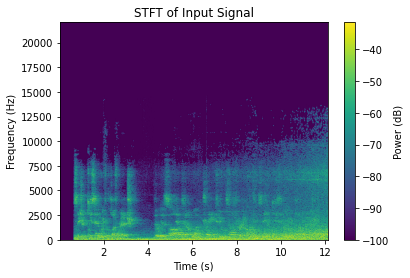

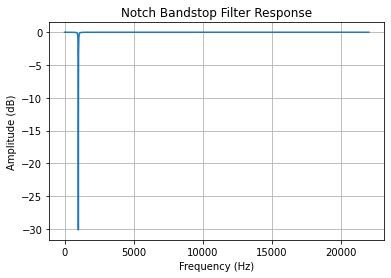

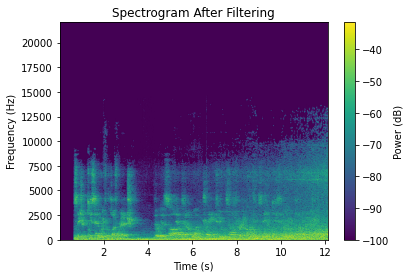

Playing original audio...
Playing filtered audio...


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import iirnotch, lfilter, freqz, spectrogram
import sounddevice as sd
import soundfile as sf

# Load the audio file
Audiofile = 'videoplayback.wav'
Input_Signal, Sampling_frequency = sf.read(Audiofile)

# Normalize the signal
Input_Signal = Input_Signal / np.max(np.abs(Input_Signal))

# Handle stereo or mono signals
Col1 = Input_Signal[:, 0]  # First channel
if Input_Signal.ndim > 1:
    Col2 = Input_Signal[:, 1]  # Second channel
else:
    Col2 = Col1  # For mono audio

# Plot the spectrogram of the input signal
plt.figure(1)
f, t, Sxx = spectrogram(Col1, fs=Sampling_frequency, nperseg=1024)
Sxx = np.maximum(Sxx, 1e-10)  # Avoid log of zero
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.title('STFT of Input Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power (dB)')
plt.show()

# Design a notch filter
f_notch = 1000  # Target notch frequency in Hz (adjust based on your requirements)
Q = 30  # Quality factor
nyquist = 0.5 * Sampling_frequency  # Nyquist frequency
b, a = iirnotch(f_notch / nyquist, Q)

# Plot the frequency response of the notch filter
w, h = freqz(b, a, worN=8000)
plt.figure(2)
plt.plot(0.5 * Sampling_frequency * w / np.pi, 20 * np.log10(abs(h)))
plt.title('Notch Bandstop Filter Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid()
plt.show()

# Apply the notch filter to the input signal
Filtered_Signal = lfilter(b, a, Input_Signal, axis=0)

# Calculate and plot the spectrogram of the filtered signal
plt.figure(3)
f_filtered, t_filtered, Sxx_filtered = spectrogram(
    Filtered_Signal[:, 0], fs=Sampling_frequency, nperseg=1024
)
Sxx_filtered = np.maximum(Sxx_filtered, 1e-10)  # Avoid log of zero
plt.pcolormesh(t_filtered, f_filtered, 10 * np.log10(Sxx_filtered), shading='gouraud')
plt.title('Spectrogram After Filtering')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power (dB)')
plt.show()

# Play the input and filtered signals for comparison
print("Playing original audio...")
sd.play(Input_Signal, Sampling_frequency)
sd.wait()

print("Playing filtered audio...")
sd.play(Filtered_Signal, Sampling_frequency)
sd.wait()


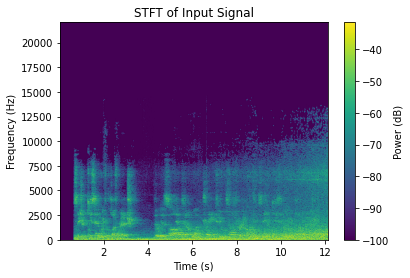

f_filtered shape: (513,)
t_filtered shape: (597,)
Sxx_filtered shape: (513, 597)


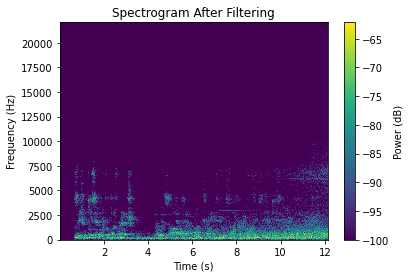

Playing original audio...
Playing filtered audio...


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, spectrogram
import sounddevice as sd
import soundfile as sf

# Load the audio file
Audiofile = 'videoplayback.wav'
Input_Signal, Sampling_frequency = sf.read(Audiofile)

# Normalize the signal
Input_Signal = Input_Signal / np.max(np.abs(Input_Signal))

# Handle stereo or mono signals
if Input_Signal.ndim > 1:
    Col1 = Input_Signal[:, 0]  # First channel
else:
    Col1 = Input_Signal  # For mono audio

# Design a bandpass filter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, data)

# Set bandpass filter parameters
lowcut = 500.0  # Lower cutoff frequency in Hz
highcut = 10000.0  # Upper cutoff frequency in Hz
Filtered_Signal = bandpass_filter(Input_Signal, lowcut, highcut, Sampling_frequency)

# Plot the spectrogram of the input signal
plt.figure(1)
f, t, Sxx = spectrogram(Col1, fs=Sampling_frequency, nperseg=1024)
Sxx = np.maximum(Sxx, 1e-10)  # Avoid log of zero
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.title('STFT of Input Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power (dB)')
plt.show()

# Ensure the signal is mono
if Filtered_Signal.ndim > 1:
    Filtered_Signal = Filtered_Signal[:, 0]  # Use the first channel

# Set nperseg based on signal length
nperseg = min(1024, len(Filtered_Signal))  # Use smaller value if signal is short

# Calculate and plot the spectrogram of the filtered signal
plt.figure(2)
f_filtered, t_filtered, Sxx_filtered = spectrogram(
    Filtered_Signal, fs=Sampling_frequency, nperseg=nperseg
)
Sxx_filtered = np.maximum(Sxx_filtered, 1e-10)  # Avoid log of zero

# Check dimensions of f_filtered, t_filtered, and Sxx_filtered
print(f"f_filtered shape: {f_filtered.shape}")
print(f"t_filtered shape: {t_filtered.shape}")
print(f"Sxx_filtered shape: {Sxx_filtered.shape}")

# Plot spectrogram
plt.pcolormesh(t_filtered, f_filtered, 10 * np.log10(Sxx_filtered), shading='nearest')
plt.title('Spectrogram After Filtering')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power (dB)')
plt.show()


# Play the input and filtered signals for comparison
print("Playing original audio...")
sd.play(Input_Signal, Sampling_frequency)
sd.wait()

print("Playing filtered audio...")
sd.play(Filtered_Signal, Sampling_frequency)
sd.wait()


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, spectrogram
import soundfile as sf

# Define the bandpass filter function
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, data)

# Create output folder if it doesn't exist
input_folder = "data"
output_folder = "outputs"
os.makedirs(output_folder, exist_ok=True)

# Set bandpass filter parameters
lowcut = 600.0  # Lower cutoff frequency in Hz
highcut = 20000.0  # Upper cutoff frequency in Hz

# Process each .wav file in the input folder
for file_name in os.listdir(input_folder):
    if file_name.endswith('.wav'):
        print(f"Processing {file_name}...")

        # Load the audio file
        audio_path = os.path.join(input_folder, file_name)
        Input_Signal, Sampling_frequency = sf.read(audio_path)

        # Normalize the signal
        Input_Signal = Input_Signal / np.max(np.abs(Input_Signal))

        # Handle stereo or mono signals
        if Input_Signal.ndim > 1:
            Col1 = Input_Signal[:, 0]  # First channel
        else:
            Col1 = Input_Signal  # For mono audio

        # Apply the bandpass filter
        Filtered_Signal = bandpass_filter(Input_Signal, lowcut, highcut, Sampling_frequency)

        # Save the filtered audio
        filtered_audio_path = os.path.join(output_folder, f"{file_name}_filtered.wav")
        sf.write(filtered_audio_path, Filtered_Signal, Sampling_frequency)

        # Plot and save the spectrogram of the input signal
        plt.figure(figsize=(10, 6))
        f, t, Sxx = spectrogram(Col1, fs=Sampling_frequency, nperseg=1024)
        Sxx = np.maximum(Sxx, 1e-10)  # Avoid log of zero
        plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
        plt.title('STFT of Input Signal')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        plt.colorbar(label='Power (dB)')
        input_spectrogram_path = os.path.join(output_folder, f"{file_name}_input_spectrogram.png")
        plt.savefig(input_spectrogram_path)
        plt.close()

        # Ensure the filtered signal is mono
        if Filtered_Signal.ndim > 1:
            Filtered_Signal = Filtered_Signal[:, 0]  # Use the first channel

        # Set nperseg based on signal length
        nperseg = min(1024, len(Filtered_Signal))

        # Calculate and save the spectrogram of the filtered signal
        plt.figure(figsize=(10, 6))
        f_filtered, t_filtered, Sxx_filtered = spectrogram(
            Filtered_Signal, fs=Sampling_frequency, nperseg=nperseg
        )
        Sxx_filtered = np.maximum(Sxx_filtered, 1e-10)  # Avoid log of zero
        plt.pcolormesh(t_filtered, f_filtered, 10 * np.log10(Sxx_filtered), shading='nearest')
        plt.title('Spectrogram After Filtering')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        plt.colorbar(label='Power (dB)')
        filtered_spectrogram_path = os.path.join(output_folder, f"{file_name}_filtered_spectrogram.png")
        plt.savefig(filtered_spectrogram_path)
        plt.close()

        print(f"Finished processing {file_name}. Outputs saved in {output_folder}.")


Processing Penn1.wav...
Finished processing Penn1.wav. Outputs saved in outputs.
Processing Penn2.wav...
Finished processing Penn2.wav. Outputs saved in outputs.
Processing SubwayShort.wav...
Finished processing SubwayShort.wav. Outputs saved in outputs.
Processing Subway_YT_short.wav...
Finished processing Subway_YT_short.wav. Outputs saved in outputs.
Processing videoplayback.wav...
Finished processing videoplayback.wav. Outputs saved in outputs.
